<a href="https://colab.research.google.com/github/cm-smith/MIMIC-Multitask-Learner/blob/main/MIMIC_Multitask_Learner_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import os
os.chdir('/content/drive/Othercomputers/My MacBook Pro/MIMIC_DL_Project/MIMIC-Multitask-Learner')

In [70]:
ls

data/        README.md  Tutorial__Advanced_Colab_Development_Environment.pdf
__init__.py  src/


In [71]:
#@title Run this code cell to import your project directory into Colab
import os, sys, time
import os.path as op

#@markdown Enter your project details:
project_path = "/content/drive/Othercomputers/My MacBook Pro/MIMIC_DL_Project/MIMIC-Multitask-Learner" #@param {type: "string"}
project_name = project_path.split("/")[-1]

#@markdown Note: you can find the path to your project folder on Google Drive by 
#@markdown searching in the Colab file system under /content/drive/ (link active once you mount your Google Drive) 
#@markdown and most likely the 'Othercomputers/' subfolder (depending on your specific
#@markdown Google Drive setup).

if not os.path.exists(project_path):
  print(f"Colab could not access the project_path you provided: {project_path}\n \
  Make sure that you have mounted your Google Drive and provide an absolute path to your project folder.")
  sys.exit()

# copy project contents into working dir
%cp -R "{project_path}" /content/ &> /dev/null

requirements_filename = "" #@param {type: "string"}

#@markdown If you do not want any `pip install` to be executed by this cell,
#@markdown leave `requirements_filename` blank.

python_version = "3.9" #@param ["3.7", "3.8", "3.9", "3.10"]

#@markdown You can ensure that Colab executes a script with your desired version
#@markdown of Python by specifying the version number in the command, such as: `!python3.9 your_script.py`

# Add a Google Drive path to project dependencies
dependencies_path = f'/content/{project_name}_packages_symlink'
if not os.path.exists(dependencies_path):
  package_src_path = f"/content/drive/MyDrive/{project_name}_packages"

  if not os.path.exists(package_src_path):
    %mkdir "{package_src_path}"

  os.symlink(package_src_path, dependencies_path)
  sys.path.insert(0, dependencies_path)

# cd into the Colab copy of the project directory
colab_project_path = op.join("/content/", f"{project_name}")
%cd -q {colab_project_path}

# install the user's Python version
print("\nInstalling user's Python version...", end =" ")
!apt-get -qq update
!apt-get -qq install python$python_version > /dev/null
print("done\n")

# Updates or installs any packages that aren't up-to-date with requirements.txt
if requirements_filename != "":
  print("Installing user's Python requirements...", end=" ")
  %pip -r {requirements_filename} --target=$dependencies_path &> /dev/null
  print("done\n")

print("Verify the desired Python version prints below:")
print("> ", end="") 
!python$python_version --version

print("\nAnd verify that you can see your project directory's contents with: %ls")
print("> ", end="")
%ls


Installing user's Python version... done

Verify the desired Python version prints below:
> Python 3.9.12

And verify that you can see your project directory's contents with: %ls
> data/        README.md  Tutorial__Advanced_Colab_Development_Environment.pdf
__init__.py  src/


In [72]:
!python --version

Python 3.7.13


In [73]:
!ls ./data

CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("data/CHARTEVENTS_reduced_24_hour_blocks_plus_admissions_plus_patients_plus_scripts_plus_icds_plus_notes.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (150,152) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [75]:
## display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [76]:
df.shape

(628391, 235)

In [77]:
df.columns.tolist()

['BUN',
 'HDL',
 'INR',
 'Inspired O2 Fraction',
 'LDL',
 'PEEP Set',
 'PTT',
 'RBCs',
 'WBCs',
 'anion gap',
 'atypical lymphocytes',
 'bands',
 'basophils',
 'blood culture',
 'central venous pressure',
 'chloride',
 'creatinine',
 'daily weight',
 'diabetes',
 'diastolic',
 'eosinophils',
 'glucose',
 'heart rate',
 'hemocrit',
 'hemoglobin',
 'lymphocytes',
 'monocytes',
 'neutrophils',
 'platelets',
 'polymorphonuclear leukocytes',
 'potassium_x',
 'pulse oximetry',
 'respiratory rate',
 'sodium',
 'systolic',
 'temperature (F)',
 'tidal volume',
 'tobacco',
 'triglycerides',
 'troponin',
 'BUN_std',
 'HDL_std',
 'INR_std',
 'Inspired O2 Fraction_std',
 'LDL_std',
 'PEEP Set_std',
 'PTT_std',
 'RBCs_std',
 'WBCs_std',
 'anion gap_std',
 'atypical lymphocytes_std',
 'bands_std',
 'basophils_std',
 'central venous pressure_std',
 'chloride_std',
 'creatinine_std',
 'diastolic_std',
 'eosinophils_std',
 'glucose_std',
 'heart rate_std',
 'hemocrit_std',
 'hemoglobin_std',
 'lymphocyt

## 0. Data prepocessing


*   Define outcomes (MI and Sepsis for now)
*   Keep patients who stayed in ICU >= 2 days
*   Create baseline data (select 1st day per patient)
*   Remove those with age, number of days in ICU > 99% quartile
*   Feature selection for MI (N = 221)
*   Feature selection for Sepsis (N = 225)
*   Split train and test data (70% train, 30% test)
    *   Ongoing (TBD): need to add a validation set






In [79]:
## define outcomes

### 1. MI
df['MI'] = ((df['troponin'] > 0.4) & (df['CKD'] == 0)).apply(lambda x: int(x))
df['MI'] .value_counts()

### 2. Sepsis
def wbc_crit(x):
  if (x > 12 or x < 4) and x != 0:
    return 1
  else:
    return 0

def temp_crit(x):
  if (x > 100.4 or x < 96.8) and x != 0:
    return 1
  else:
    return 0

df['hr_sepsis'] = df['heart rate'].apply(lambda x: 1 if x > 90 else 0)
df['respiratory rate_sepsis'] = df['respiratory rate'].apply(lambda x: 1 if x>20 else 0)
df['wbc_sepsis'] = df['WBCs'].apply(wbc_crit) 
df['temperature f_sepsis'] = df['temperature (F)'].apply(temp_crit) 
df['sepsis_points'] = (df['hr_sepsis'] + df['respiratory rate_sepsis'] 
                          + df['wbc_sepsis'] + df['temperature f_sepsis'])
df['Sepsis'] = ((df['sepsis_points'] >= 2) & (df['Infection'] == 1)).apply(lambda x: int(x))
df['Sepsis'].value_counts()

0    624300
1      4091
Name: MI, dtype: int64

0    536479
1     91912
Name: Sepsis, dtype: int64

In [80]:
# The data is at the HADM_ID/HADMID_DAY-level
assert sum(df.groupby(['HADM_ID', 'HADMID_DAY']).size().values) == df.shape[0]

In [81]:
day_counts = df.groupby(['HADM_ID']).size().values
print("Mean and SD day count: (%.2f, %.2f)" % (day_counts.mean(), day_counts.std()))
print("Quantiles for day count:")
quantile_cuts = np.array([0.,0.01,0.25,0.5,0.75,0.99,1.0])
dict(zip(quantile_cuts, np.quantile(day_counts, quantile_cuts)))

Mean and SD day count: (10.83, 25.92)
Quantiles for day count:


{0.0: 1.0, 0.01: 1.0, 0.25: 4.0, 0.5: 7.0, 0.75: 12.0, 0.99: 64.0, 1.0: 3660.0}

In [157]:
from re import M
# Number of unique patients
n = len(pd.unique(df['HADM_ID']))
n
# keep patients with at least 2 days
df['day_counts'] = df.groupby(['HADM_ID'])["HADM_ID"].transform("count")
#df[['HADM_ID','HADMID_DAY','day_counts']].head()

m = df['day_counts'].ge(2).groupby(df['HADM_ID']).transform('all')
df_s = df[m]
#df_s[['HADM_ID','HADMID_DAY','day_counts']].head()
df_s.shape

# Number of unique patients left
n = len(pd.unique(df_s['HADM_ID']))
n

# select first obs per patient as baseline 
df_bl = df_s.groupby('HADM_ID').first().reset_index()

# check number of days (min shoube be > 1)
df_bl[['day_counts']].describe()

58034

(624949, 243)

54592

,day_counts
count,54592.00000
mean,11.44763
std,26.60095
min,2.00000
25%,5.00000
50%,8.00000
75%,13.00000
max,3660.00000


In [158]:
### delete those with age, day_counts >= 99% quartiles
df_bl = df_bl[df_bl.AGE < df_bl.AGE.quantile(.99)]
df_bl = df_bl[df_bl.day_counts < df_bl.day_counts.quantile(.99)]
df_bl[['day_counts']].describe()

,day_counts
count,51543.000000
mean,10.492463
std,9.435282
min,2.000000
25%,5.000000
50%,7.000000
75%,13.000000
max,66.000000


In [170]:
## convert admission time format
df_bl['ADMITTIME'] = pd.to_datetime(df_bl['ADMITTIME'],errors='coerce')
df_bl[['ADMITTIME']].head()

df_bl['ADMITTIME'] = df_bl[('ADMITTIME')].values.astype("float64")

,ADMITTIME
0,2117-09-11 11:46:00
1,2150-04-17 15:34:00
2,2108-04-06 15:49:00
3,2145-03-31 05:33:00
4,2162-05-16 15:56:00


In [171]:
### split train and test set
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_bl, test_size=0.3)
train_data.head()
train_data.shape

,HADM_ID,BUN,HDL,INR,Inspired O2 Fraction,LDL,PEEP Set,PTT,RBCs,WBCs,anion gap,atypical lymphocytes,bands,basophils,blood culture,central venous pressure,chloride,creatinine,daily weight,diabetes,diastolic,eosinophils,glucose,heart rate,hemocrit,hemoglobin,lymphocytes,monocytes,neutrophils,platelets,polymorphonuclear leukocytes,potassium_x,pulse oximetry,respiratory rate,sodium,systolic,temperature (F),tidal volume,tobacco,triglycerides,troponin,BUN_std,HDL_std,INR_std,Inspired O2 Fraction_std,LDL_std,PEEP Set_std,PTT_std,RBCs_std,WBCs_std,anion gap_std,atypical lymphocytes_std,bands_std,basophils_std,central venous pressure_std,chloride_std,creatinine_std,diastolic_std,eosinophils_std,glucose_std,heart rate_std,hemocrit_std,hemoglobin_std,lymphocytes_std,monocytes_std,neutrophils_std,platelets_std,polymorphonuclear leukocytes_std,potassium_std,pulse oximetry_std,respiratory rate_std,sodium_std,systolic_std,temperature (F)_std,tidal volume_std,triglycerides_std,troponin_std,BUN_min,HDL_min,INR_min,Inspired O2 Fraction_min,LDL_min,PEEP Set_min,PTT_min,RBCs_min,WBCs_min,anion gap_min,atypical lymphocytes_min,bands_min,basophils_min,central venous pressure_min,chloride_min,creatinine_min,diastolic_min,eosinophils_min,glucose_min,heart rate_min,hemocrit_min,hemoglobin_min,lymphocytes_min,monocytes_min,neutrophils_min,platelets_min,polymorphonuclear leukocytes_min,potassium_min,pulse oximetry_min,respiratory rate_min,sodium_min,systolic_min,temperature (F)_min,tidal volume_min,triglycerides_min,troponin_min,BUN_max,HDL_max,INR_max,Inspired O2 Fraction_max,LDL_max,PEEP Set_max,PTT_max,RBCs_max,WBCs_max,anion gap_max,atypical lymphocytes_max,bands_max,basophils_max,central venous pressure_max,chloride_max,creatinine_max,diastolic_max,eosinophils_max,glucose_max,heart rate_max,hemocrit_max,hemoglobin_max,lymphocytes_max,monocytes_max,neutrophils_max,platelets_max,polymorphonuclear leukocytes_max,potassium_max,pulse oximetry_max,respiratory rate_max,sodium_max,systolic_max,temperature (F)_max,tidal volume_max,triglycerides_max,troponin_max,HADMID_DAY,BLACK,ADMITTIME,SUBJECT_ID,DOB,YOB,ADMITYEAR,AGE,M,0.9% Sodium Chloride,SMX-TMP,acetominophen,albuterol,amiodarone,amoxicillin,ampicillin-sulbactam,asprin,atenolol,atropine,calcium gluconate,captopril,carvedilol,cefazolin,cefepime,ceftriaxone,clonazepam,clopidogrel,dextrose,diazepam,digoxin(?!.*fab),diltiazem,diphenhydramine,enoxaparin,epoetin,fentanyl,fentanyl citrate,fluconazole,fondaparinux,furosemide,glucagon,haloperidol,heparin,hydralazine,hydrochlorothiazide,hydromorphone,insulin,ipratropium,labetalol,levetiracetam,levofloxacin,levothyroxine,lisinopril,magensium sulfate,meropenem,metoclopramide,metoprolol,metronidazole,midazolam,nafcillin,neostigmine,nitroglycerin,nitroprusside,norepinephrine,ondansetron,oxacillin,oxycodone,pantoprazole,penicillin,phenylephrine,phenytoin,phytonadione,piperacillin,potassium_y,prednisone,propofol,ranitidine,statin,tacrolimus,trazodone,vancomycin,vasopressin,warfarin,zolpidem,CKD,Infection,ct_angio,MI,hr_sepsis,respiratory rate_sepsis,wbc_sepsis,temperature f_sepsis,sepsis_points,Sepsis,day_counts
49236,190143,20.0,41.0,15.3,50.0,81.0,6.5,32.4,4.18,9.8,13.0,0.0,1.0,0.1,1210.0,12.086957,100.0,1.00,108.599998,0.0,68.269231,0.6,126.333333,78.230769,36.099998,12.0,9.0,4.0,82.0,166.0,82.0,4.15,97.12,21.137931,140.0,142.846154,98.800001,566.666667,0.0,117.0,0.07,0.0,0.0,0.0,0.0,0.0,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.557783,0.0,12.143585,9.441643,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.288675,0.0,7.647241,0.0,18.860949,0.173207,0.0,0.0,0.0,20.0,41.0,15.2,40.0,80.25,5.0,31.6,4.18,9.8,13.0,0.0,1.0,0.1,6.0,100.0,1.0,2.0,0.6,118.0,66.0,36.099998,12.0,9.0,4.0,81.9,166.0,82.0,3.9,93.0,12.0,140.0,111.0,98.599998,550.0,116.0,0.07,20.0,41.0,15.4,50.0,81.0,8.0,32.7,4.18,9.8,13.0,0.0,1.0,0.1,18.0,100.0,1.0,96.0,0.6,142.0,96.0,36.099998,12.0,9.0,4.0,82.0,166.0,82.0,4.4,100.0,34.0,140.0,138.0,98.900002,600.0,117.0,0.07,190143_2166-03-07,0.0,6.190690e+18,20535.0

(36080, 243)

In [172]:
## feature selection

### 1. feature for MI (221)
drop = ['ct_angio', 'troponin', 'troponin_std', 'troponin_min', 'troponin_max', 'Infection','CKD','hr_sepsis',
        'respiratory rate_sepsis','wbc_sepsis','temperature f_sepsis','sepsis_points','vancomycin',
        'HADM_ID', 'SUBJECT_ID','YOB','ADMITYEAR','DOB','Sepsis','day_counts','HADMID_DAY']
tmp =df_bl.drop(drop, axis=1)
MI_features = list(tmp.columns.values)
MI_features.remove('MI')
X_MI_train = train_data[MI_features]
y_MI_train = train_data['MI']
X_MI_val = test_data[MI_features]
y_MI_val = test_data['MI']

X_MI_train.shape
y_MI_train.shape

X_MI_val.shape
y_MI_val.shape

### 2. feature for sepsis (225)
drop = ['ct_angio', 'Infection','CKD','hr_sepsis',
        'respiratory rate_sepsis','wbc_sepsis','temperature f_sepsis','sepsis_points','vancomycin',
        'HADM_ID', 'SUBJECT_ID','YOB','ADMITYEAR','DOB','MI','day_counts','HADMID_DAY']
tmp =df_bl.drop(drop, axis=1)
sepsis_features = list(tmp.columns.values)
sepsis_features.remove('Sepsis')
X_sepsis_train = train_data[sepsis_features]
y_sepsis_train = train_data['Sepsis']
X_sepsis_val = test_data[sepsis_features]
y_sepsis_val = test_data['Sepsis']

X_sepsis_train.shape
y_sepsis_train.shape

X_sepsis_val.shape
y_sepsis_val.shape

(36080, 221)

(36080,)

(15463, 221)

(15463,)

(36080, 225)

(36080,)

(15463, 225)

(15463,)

In [165]:
X_MI_train.columns.tolist()

['BUN',
 'HDL',
 'INR',
 'Inspired O2 Fraction',
 'LDL',
 'PEEP Set',
 'PTT',
 'RBCs',
 'WBCs',
 'anion gap',
 'atypical lymphocytes',
 'bands',
 'basophils',
 'blood culture',
 'central venous pressure',
 'chloride',
 'creatinine',
 'daily weight',
 'diabetes',
 'diastolic',
 'eosinophils',
 'glucose',
 'heart rate',
 'hemocrit',
 'hemoglobin',
 'lymphocytes',
 'monocytes',
 'neutrophils',
 'platelets',
 'polymorphonuclear leukocytes',
 'potassium_x',
 'pulse oximetry',
 'respiratory rate',
 'sodium',
 'systolic',
 'temperature (F)',
 'tidal volume',
 'tobacco',
 'triglycerides',
 'BUN_std',
 'HDL_std',
 'INR_std',
 'Inspired O2 Fraction_std',
 'LDL_std',
 'PEEP Set_std',
 'PTT_std',
 'RBCs_std',
 'WBCs_std',
 'anion gap_std',
 'atypical lymphocytes_std',
 'bands_std',
 'basophils_std',
 'central venous pressure_std',
 'chloride_std',
 'creatinine_std',
 'diastolic_std',
 'eosinophils_std',
 'glucose_std',
 'heart rate_std',
 'hemocrit_std',
 'hemoglobin_std',
 'lymphocytes_std',
 'mo

## 1. Data summary

### 1.1 Number of patients in total; number of patients in train and test

In [173]:
print(df_bl.shape[0]) ## total number of patients

print(train_data.shape[0]) ## total number of patients in train set

print(test_data.shape[0])  ## total number of patients in test set

51543
36080
15463


### 1.2 Average age, percentage of gender and race

In [174]:
df_bl['AGE'].describe()
df_bl['M'].value_counts(normalize=True) * 100
df_bl['BLACK'].value_counts(normalize=True) * 100

train_data['AGE'].describe()
train_data['M'].value_counts(normalize=True) * 100
train_data['BLACK'].value_counts(normalize=True) * 100

test_data['AGE'].describe()
test_data['M'].value_counts(normalize=True) * 100
test_data['BLACK'].value_counts(normalize=True) * 100

count    51543.000000
mean        55.488175
std         25.256770
min          0.000000
25%         45.000000
50%         62.000000
75%         75.000000
max         89.000000
Name: AGE, dtype: float64

1.0    55.664203
0.0    44.335797
Name: M, dtype: float64

0.0    90.27802
1.0     9.72198
Name: BLACK, dtype: float64

count    36080.000000
mean        55.495538
std         25.298550
min          0.000000
25%         45.000000
50%         62.000000
75%         75.000000
max         89.000000
Name: AGE, dtype: float64

1.0    55.712306
0.0    44.287694
Name: M, dtype: float64

0.0    90.257761
1.0     9.742239
Name: BLACK, dtype: float64

count    15463.000000
mean        55.470995
std         25.159824
min          0.000000
25%         45.000000
50%         62.000000
75%         75.000000
max         89.000000
Name: AGE, dtype: float64

1.0    55.551963
0.0    44.448037
Name: M, dtype: float64

0.0    90.325293
1.0     9.674707
Name: BLACK, dtype: float64

### 1.3 Distribution of number of days in ICU

count    51543.000000
mean        10.492463
std          9.435282
min          2.000000
25%          5.000000
50%          7.000000
75%         13.000000
max         66.000000
Name: day_counts, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0723c9dc50>]],
      dtype=object)

count    36080.000000
mean        10.522062
std          9.479854
min          2.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         66.000000
Name: day_counts, dtype: float64

count    15463.000000
mean        10.423398
std          9.330391
min          2.000000
25%          5.000000
50%          7.000000
75%         13.000000
max         66.000000
Name: day_counts, dtype: float64

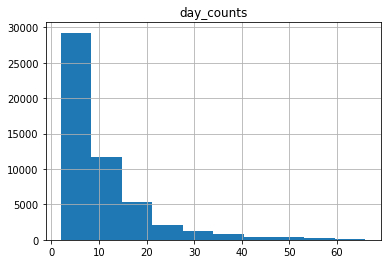

In [168]:
df_bl['day_counts'].describe()
df_bl[['day_counts']].hist()

train_data['day_counts'].describe()
test_data['day_counts'].describe()


## 2. Baseline model
### 2.1 Logistic regression

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### 1. MI

LogisticMod = LogisticRegression(solver = 'liblinear')
LogisticMod.fit(X_MI_train, y_MI_train )
acc_train = LogisticMod.score(X_MI_train, y_MI_train)
acc_val = LogisticMod.score(X_MI_val, y_MI_val)

print("-"*10 + " Training Set (MI) " + "-"*10)
print(f'Accuracy: {acc_train}')

print("-"*10 + " Validation Set (MI) " + "-"*10)
print(f'Accuracy: {acc_val}')

### 2. Sepsis 
LogisticMod = LogisticRegression(solver = 'liblinear')
LogisticMod.fit(X_sepsis_train, y_sepsis_train )
acc_train = LogisticMod.score(X_sepsis_train, y_sepsis_train)
acc_val = LogisticMod.score(X_sepsis_val, y_sepsis_val)

print("-"*10 + " Training Set (Sepsis) " + "-"*10)
print(f'Accuracy: {acc_train}')

print("-"*10 + " Validation Set (Sepsis) " + "-"*10)
print(f'Accuracy: {acc_val}')

LogisticRegression(solver='liblinear')

---------- Training Set (MI) ----------
Accuracy: 0.9783536585365854
---------- Validation Set (MI) ----------
Accuracy: 0.9782707107288365


LogisticRegression(solver='liblinear')

---------- Training Set (Sepsis) ----------
Accuracy: 0.7432372505543238
---------- Validation Set (Sepsis) ----------
Accuracy: 0.7453922266054452


### 2.2 Multi-layer neural network
**Accuracies of both outcomes does not improve when N_EPOCHS > 2**

In [186]:
# Train a multi-layer neural network using Keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

N_EPOCHS = 10 # performance doesn't improve after N_POCHS>2
BATCH_SIZE = 30 # Decide on the batch size 

### 2.2.1 MI

In [195]:
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

## Define the model
model = Sequential()
## Your model specification goes below
num_features = X_MI_train.shape[1]

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer'))
model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 

## After you have specified the model, compile it with an appropriate loss function and optimizer
opt = SGD(learning_rate=0.1)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
## Now fit the model with a call to model.fit()
history = model.fit(x=X_MI_train, 
         y=y_MI_train,
         validation_data = (X_MI_val, y_MI_val),
         batch_size=BATCH_SIZE,
         epochs=N_EPOCHS)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                7104      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 7,137
Trainable params: 7,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1203/1203 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9776 - val_loss: nan - val_accuracy: 0.9784
Epoch 2/10
1203/1203 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9785 - val_loss: nan - val_accuracy: 0.9784
Epoch 3/10
1203/1203 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.9785 - val_loss: nan - val_accuracy: 0.9784
Epoch 4/10
1203/1203 [===========

### 2.2 Sepsis

In [200]:
from pyparsing.core import Opt
## Define the model
model = Sequential()
## Your model specification goes below
num_features = X_sepsis_train.shape[1]

## add more layers/dropout didn't improve accuracy, performance didn't improve after EPOCH > 2
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=num_features, name='hidden_layer'))
model.add(Dense(units=1, activation='sigmoid', name='output_layer')) 

## After you have specified the model, compile it with an appropriate loss function and optimizer
opt = SGD(learning_rate=0.1)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


## Now fit the model with a call to model.fit()
history = model.fit(x=X_sepsis_train, 
         y=y_sepsis_train,
         validation_data = (X_sepsis_val, y_sepsis_val),
         batch_size=BATCH_SIZE,
         epochs=N_EPOCHS)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 32)                7232      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 7,265
Trainable params: 7,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1203/1203 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.7431 - val_loss: nan - val_accuracy: 0.7455
Epoch 2/10
1203/1203 [==============================] - 4s 4ms/step - loss: nan - accuracy: 0.7434 - val_loss: nan - val_accuracy: 0.7455
Epoch 3/10
1203/1203 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.7434 - val_loss: nan - val_accuracy: 0.7455
Epoch 4/10
1203/1203 [===========